In [13]:
import matplotlib as mpl
from pylab import *
from qutip import *
from matplotlib import cm
import imageio
# import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA

In [2]:
def animate_bloch(states, duration=0.1, save_all=False, name="bloch_anim.gif"):

    b = Bloch()
    b.vector_color = ['r']
    b.view = [-40,30]
    images=[]
    try:
        length = len(states)
    except:
        length = 1
        states = [states]
    ## normalize colors to the length of data ##
    nrm = mpl.colors.Normalize(0,length)
    colors = cm.cool(nrm(range(length))) # options: cool, summer, winter, autumn etc.

    ## customize sphere properties ##
    b.point_color = list(colors) # options: 'r', 'g', 'b' etc.
    b.point_marker = ['o']
    b.point_size = [30]
    
    for i in range(length):
        b.clear()
        b.add_states(states[i])
        b.add_states(states[:(i+1)],'point')
        if save_all:
            b.save(dirc='tmp') #saving images to tmp directory
            filename="tmp/bloch_%01d.png" % i
        else:
            filename='temp_file.png'
            b.save(filename)
        images.append(imageio.imread(filename))
    imageio.mimsave(name, images, duration=duration)

In [11]:
states = []
thetas = linspace(0,pi/2,21)
phis = linspace(0+0j, 1+0j, 21)

for theta, phi in zip(thetas, phis):
    states.append((cos(theta)*basis(2,0)+(phi)*sin(theta)*basis(2,1)).unit())

# for theta in thetas:
#     states.append((cos(theta/2)*basis(2,0)+sin(pi)*basis(2,1)).unit())
# for phi in phis:
#     states.append((cos(0)*basis(2,0) + (exp((phi*1j)*pi/2))*sin(pi/2)*basis(2,1)).unit())

animate_bloch(states, duration=0.1, save_all=False, name="x180_rotation.gif")

In [284]:
phis = linspace(0+0j, 0+1j, 21)
print(phis)

[0.+0.j   0.+0.05j 0.+0.1j  0.+0.15j 0.+0.2j  0.+0.25j 0.+0.3j  0.+0.35j
 0.+0.4j  0.+0.45j 0.+0.5j  0.+0.55j 0.+0.6j  0.+0.65j 0.+0.7j  0.+0.75j
 0.+0.8j  0.+0.85j 0.+0.9j  0.+0.95j 0.+1.j  ]


In [283]:
exp(0*1j)

(1+0j)

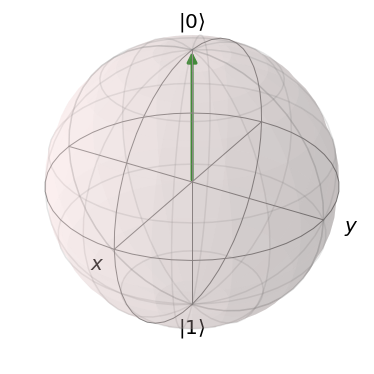

In [268]:
b = Bloch()
thetas = linspace(0, pi/2, 21)
phis = linspace(1+0j, 0+1j, 21)
states = []
z_state = (cos(0)*basis(2,0)+sin()*basis(2,1)).unit()
# y_state = (cos(0)*basis(2,0) + (exp(1j*pi/2))*sin(pi/2)*basis(2,1)).unit()
# x_state = (cos(0)*basis(2,0)+(1+0j)*sin(pi/2)*basis(2,1)).unit()
b.add_states(z_state)
# b.add_states(y_state)
b.show()

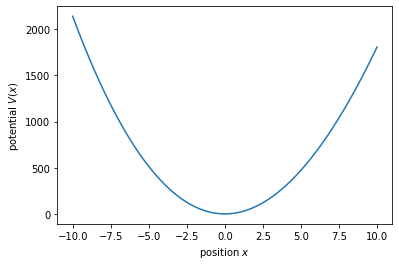

In [24]:
#parameters of the harmonic potential

omega = 2*np.pi; m = 1;hbar = 1

# parameters of the grid
Ngrid = 1001; xmin = -10; xmax = 10;
gamma = -1.0
xvec = np.linspace(xmin,xmax,Ngrid);#a vector spanning from -10 to 10 with 100 grid points
# Vx = (m*omega**2/2*xvec**2);
Vx = m*omega**2/2*xvec**2+(gamma/6*xvec**3)

f, ax = plt.subplots()
ax.plot(xvec,Vx);
ax.set_xlabel('position $x$');
ax.set_ylabel('potential $V(x)$');